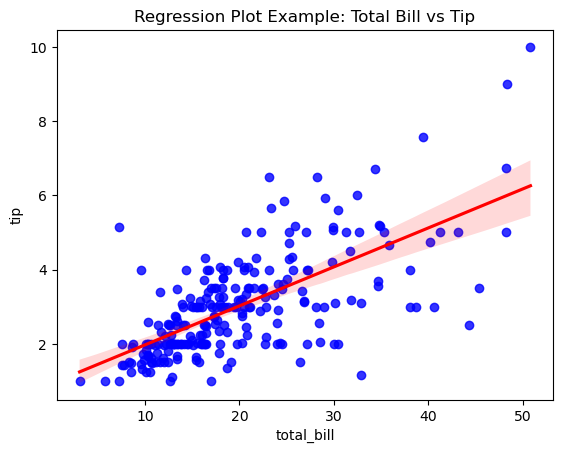

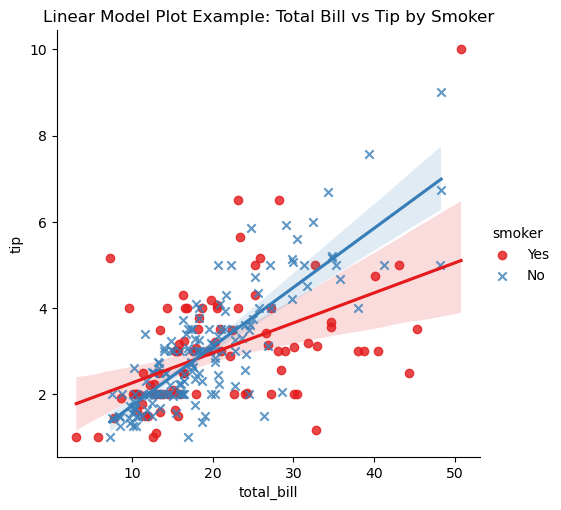

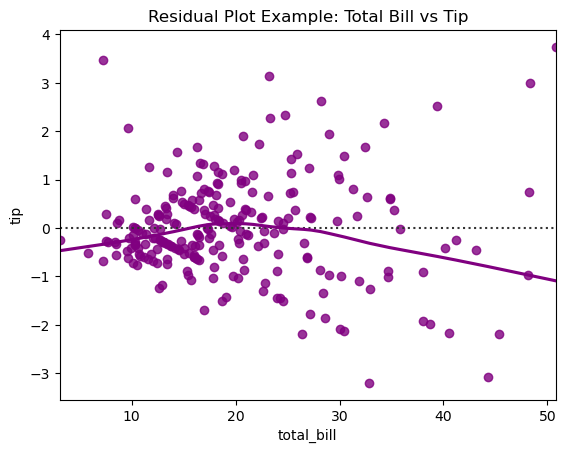

In [7]:
"""
Regression Plots with Seaborn
Regression plots in Seaborn are used to visualize the relationship between two variables 
along with a regression line that shows the trend. These plots are crucial for understanding the linear
relationship between variables, checking for trends, and diagnosing potential issues in your data.

Linear Regression: sns.regplot, sns.lmplot
Linear regression plots show the relationship between a dependent variable and an independent variable, 
fitting a linear model to the data. Seaborn provides two functions, sns.regplot for simple regression plots and 
sns.lmplot for more complex, multi-faceted plots.

Explanation:

x='total_bill', y='tip': Specifies the variables to plot on the x and y axes.
scatter_kws={"color": "blue"}: Customizes the scatter plot points' color.
line_kws={"color": "red"}: Customizes the regression line's color.
sns.regplot is best for simple regression analysis when you’re focusing on one relationship at a time.

sns.regplot
"""
import seaborn as sns
import matplotlib.pyplot as plt

# Load the sample tips dataset
data = sns.load_dataset('tips')

# Create a regression plot
sns.regplot(x='total_bill', y='tip', data=data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Add title
plt.title('Regression Plot Example: Total Bill vs Tip')
plt.show()


"""
sns.lmplot
lmplot offers more flexibility, particularly for handling categorical data and multiple plots.

Explanation:

hue='smoker': Differentiates the data points by whether the customer was a smoker or not, adding 
color and different markers to the plot.
markers=["o", "x"]: Specifies different markers for the categories in the hue variable.
palette="Set1": Specifies the color palette used for different categories.
sns.lmplot is ideal when you want to explore multiple relationships or when you need to incorporate 
categorical data into your regression analysis.
"""

# Load the sample tips dataset
data = sns.load_dataset('tips')

# Create a linear model plot with a categorical variable
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=data, markers=["o", "x"], palette="Set1")

# Add title
plt.title('Linear Model Plot Example: Total Bill vs Tip by Smoker')
plt.show()


"""
Residual Plots: sns.residplot
A residual plot shows the residuals (the differences between observed and predicted values) from a regression model. 
It helps in diagnosing issues with your model, such as non-linearity or heteroscedasticity (unequal variance).

Explanation:

lowess=True: Adds a locally weighted scatterplot smoothing (LOWESS) line to help visualize the trend in residuals. 
This is useful for identifying patterns that may indicate a problem with the model.
color='purple': Sets the color of the residual points and the smoothing line.
sns.residplot is essential for checking the assumptions of linear regression, such as the assumption of homoscedasticity
(constant variance of residuals).
"""
# Load the sample tips dataset
data = sns.load_dataset('tips')

# Create a residual plot
sns.residplot(x='total_bill', y='tip', data=data, lowess=True, color='purple')

# Add title
plt.title('Residual Plot Example: Total Bill vs Tip')
plt.show()

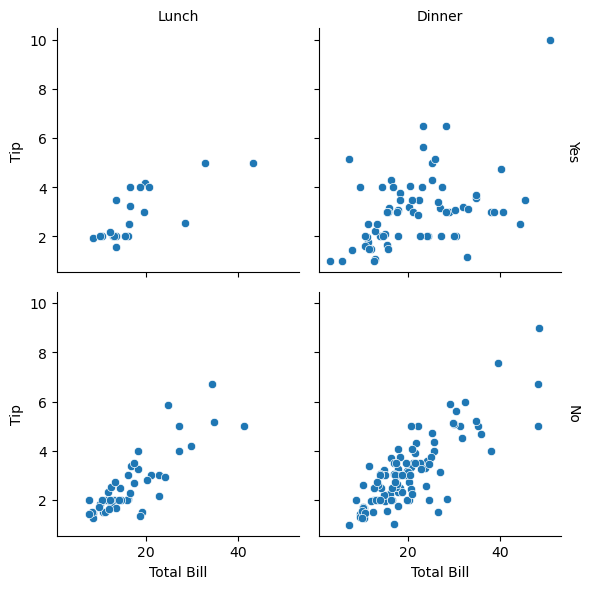

D:\Anaconda\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


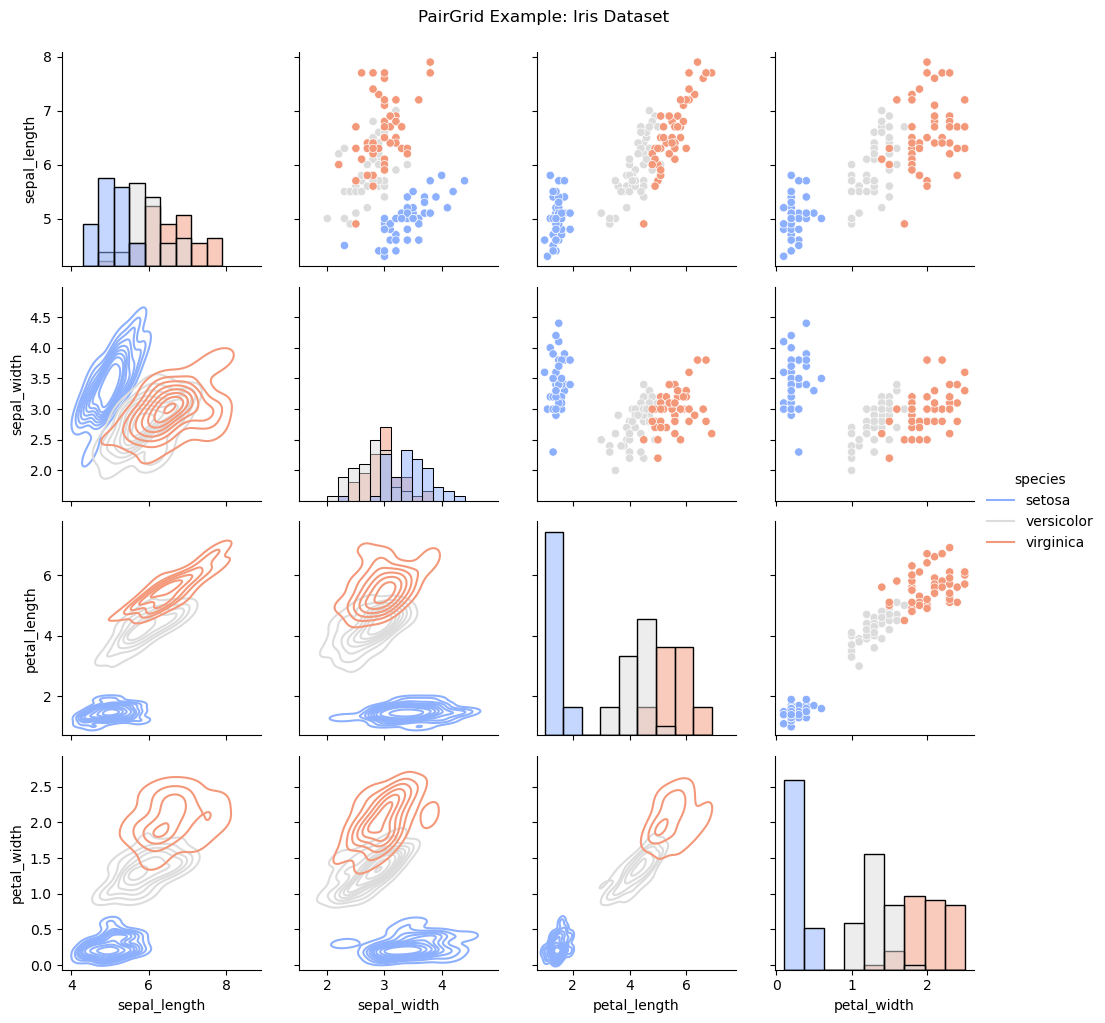

In [8]:
"""
Multi-plot grids in Seaborn allow you to create complex visualizations by splitting data into subplots based 
on categorical variables. This is especially useful when you want to explore relationships across different 
subsets of your data.

FacetGrid: sns.FacetGrid
FacetGrid is a general class for creating grids of plots based on the values of one or more categorical variables. 
It allows you to create a grid of plots by "faceting" the data along rows, columns, or both.

Explanation:

col="time" and row="smoker": The data is split into a grid where each column represents a different time 
(Lunch or Dinner), and each row represents whether the person was a smoker or not.
g.map(sns.scatterplot, "total_bill", "tip"): Applies a scatter plot to each subset of the data in the grid.
margin_titles=True: Places the titles for the row and column facets on the margins for clarity.
FacetGrid is highly customizable and allows you to create intricate plots that reveal insights across 
different subsets of your data.
"""

# Load the sample tips dataset
data = sns.load_dataset('tips')

# Create a FacetGrid with 'time' as columns and 'smoker' as rows
g = sns.FacetGrid(data, col="time", row="smoker", margin_titles=True)
g.map(sns.scatterplot, "total_bill", "tip")

# Add titles and labels
g.set_axis_labels("Total Bill", "Tip")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.show()

"""
PairGrid: sns.PairGrid
PairGrid is similar to sns.pairplot, but it gives you more control over the types of plots used on 
the diagonal, upper, and lower parts of the grid. It’s useful when you need more customization in your pair plots.

Explanation:

hue="species": Colors the data points by the species of iris.
g.map_upper(sns.scatterplot): Applies a scatter plot to the upper triangle of the grid.
g.map_lower(sns.kdeplot, cmap="Blues_d"): Applies a KDE plot to the lower triangle, using the "Blues_d" colormap.
g.map_diag(sns.histplot): Applies histograms to the diagonal plots.
PairGrid offers flexibility in creating pair plots, allowing different plot types on different parts of the grid, 
making it ideal for detailed explorations of relationships between pairs of variables.
"""

# Load the sample iris dataset
data = sns.load_dataset('iris')

# Create a PairGrid
g = sns.PairGrid(data, hue="species", palette="coolwarm")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.histplot)

# Add legend and title
g.add_legend()
plt.suptitle('PairGrid Example: Iris Dataset', y=1.02)
plt.show()



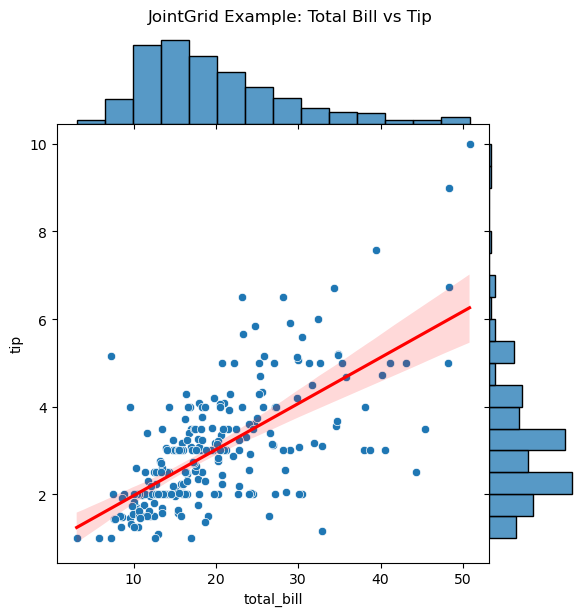

In [9]:
"""
JointGrid: sns.JointGrid
JointGrid allows you to create a custom visualization that combines a bivariate plot with marginal 
plots, offering more control than sns.jointplot.

Explanation:

x="total_bill", y="tip": Specifies the variables for the x and y axes.
g.plot(sns.scatterplot, sns.histplot): Combines a scatter plot in the main plot with histograms on the margins.
sns.regplot: Adds a regression line to the main plot, highlighting the trend.
JointGrid provides a high level of customization for joint plots, allowing you to combine different types of 
plots to create a detailed visualization of the relationship between two variables.
"""

# Load the sample tips dataset
data = sns.load_dataset('tips')

# Create a JointGrid
g = sns.JointGrid(data=data, x="total_bill", y="tip", space=0)
g.plot(sns.scatterplot, sns.histplot)

# Add regression line
sns.regplot(x="total_bill", y="tip", data=data, ax=g.ax_joint, scatter=False, color="red")

# Add title
plt.suptitle('JointGrid Example: Total Bill vs Tip', y=1.02)
plt.show()

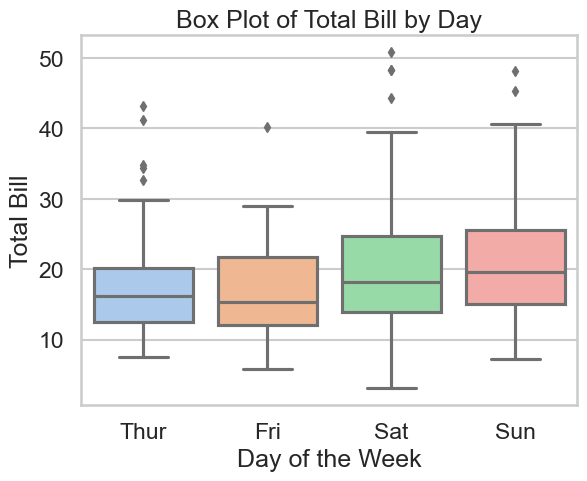

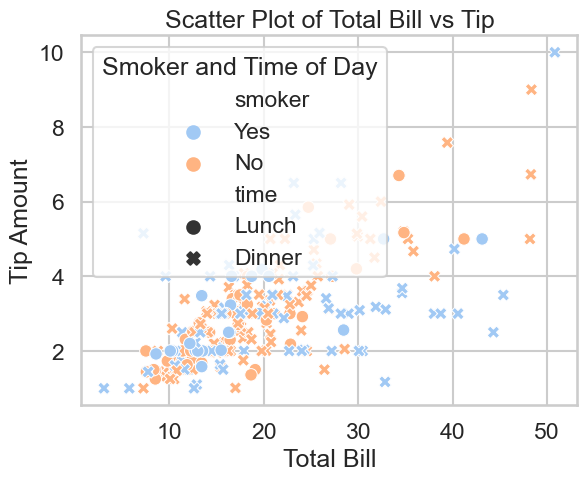

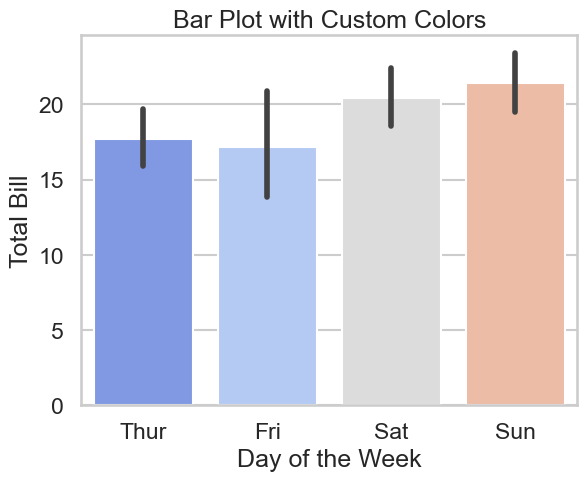

In [10]:
"""
Customizing plots in Seaborn is essential for creating effective visualizations that are not only 
informative but also aesthetically pleasing. Below are some key techniques for customizing your plots,
including setting aesthetic parameters, adding titles and labels, customizing colors, handling figure sizes, and saving figures.

Setting Aesthetic Parameters: sns.set, sns.set_style
Seaborn allows you to control the overall aesthetic of your plots using sns.set and sns.set_style. 
These functions enable you to apply themes that adjust the look of your plots, making them more visually appealing.


Explanation:

sns.set(style="whitegrid", context="talk", palette="pastel"): This line sets the overall aesthetic of the plot.
style="whitegrid": Sets a white background with gridlines, which is useful for plots that need a clear, clean look.
context="talk": Adjusts the size of the elements in the plot for presentations or talks.
palette="pastel": Applies a pastel color palette to the plot, which is soft and visually appealing.
sns.set_style allows you to set the style of the plot (like "darkgrid", "whitegrid", "dark", "white", and "ticks") 
independently of other aesthetic settings.
"""
# Set the aesthetic parameters
sns.set(style="whitegrid", context="talk", palette="pastel")

# Load the sample tips dataset
data = sns.load_dataset('tips')

# Create a box plot
sns.boxplot(x="day", y="total_bill", data=data)

# Add title and labels
plt.title("Box Plot of Total Bill by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill")

plt.show()

"""
Adding Titles, Labels, and Legends
Adding titles, labels, and legends is crucial for making your plots understandable.

Explanation:

plt.title("Scatter Plot of Total Bill vs Tip"): Adds a title to the plot.
plt.xlabel("Total Bill"), plt.ylabel("Tip Amount"): Label the x and y axes.
plt.legend(title="Smoker and Time of Day"): Adds a legend with a title, showing how data 
points are categorized by smoker status and time of day.
"""

# Load the sample tips dataset
data = sns.load_dataset('tips')

# Create a scatter plot
sns.scatterplot(x="total_bill", y="tip", hue="smoker", style="time", data=data)

# Add title, labels, and legend
plt.title("Scatter Plot of Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.legend(title="Smoker and Time of Day")

plt.show()


"""
Customizing Colors and Palettes: sns.color_palette, sns.cubehelix_palette
Customizing colors and palettes helps in making the plot visually engaging and in highlighting specific data points.

Explanation:

palette = sns.color_palette("coolwarm", 5): Creates a custom color palette using the "coolwarm" palette with 5 colors.
sns.barplot(..., palette=palette): Applies the custom palette to the bar plot.
sns.cubehelix_palette is another function to create a sequential palette that is particularly effective for plots 
where data needs to be visually distinguished by intensity.
"""
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
palette = sns.color_palette("coolwarm", 5)

# Load the sample tips dataset
data = sns.load_dataset('tips')

# Create a bar plot
sns.barplot(x="day", y="total_bill", data=data, palette=palette)

# Add title and labels
plt.title("Bar Plot with Custom Colors")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill")

plt.show()

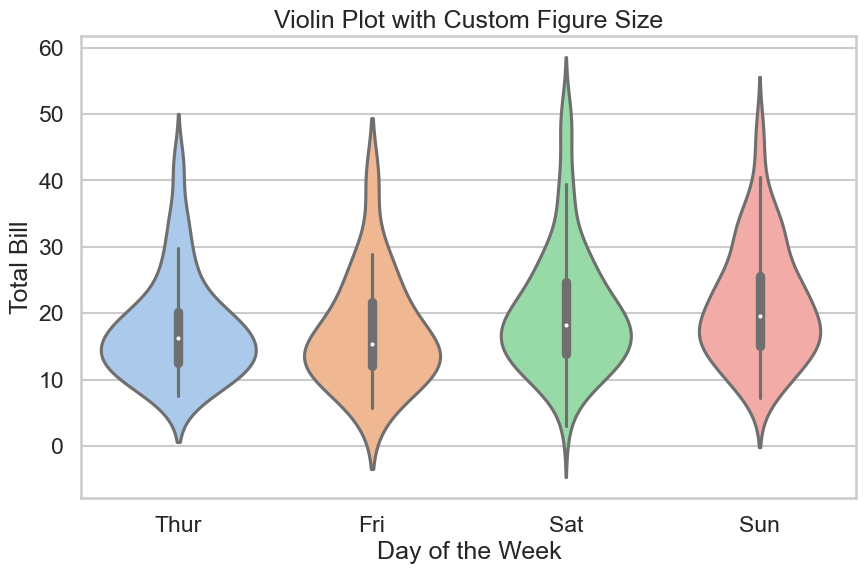

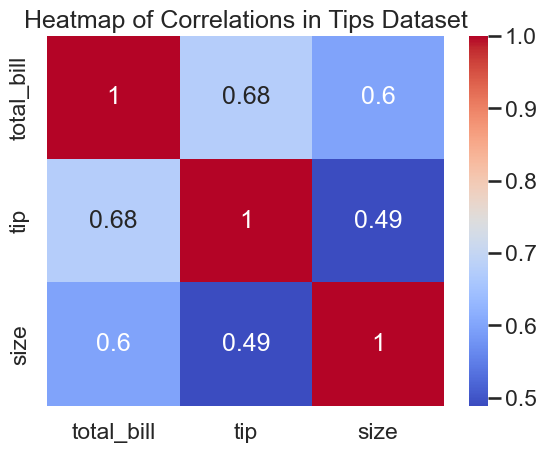

In [12]:
"""
Handling Figure Sizes and Aspect Ratios
Controlling the size and aspect ratio of your plots ensures that they fit well in your presentations or documents.

Explanation:

plt.figure(figsize=(10, 6)): Sets the size of the plot to 10 inches wide and 6 inches tall.
Controlling figure size is important when you have to embed plots in documents with specific dimensions.
Saving Figures: plt.savefig
Saving your plots to a file is essential when you want to include them in reports or share them.
"""
# Load the sample tips dataset
data = sns.load_dataset('tips')

# Set figure size
plt.figure(figsize=(10, 6))

# Create a violin plot
sns.violinplot(x="day", y="total_bill", data=data)

# Add title and labels
plt.title("Violin Plot with Custom Figure Size")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill")

plt.show()


"""
Saving Figures: plt.savefig
Saving your plots to a file is essential when you want to include them in reports or share them.

Explanation:

plt.savefig("heatmap_tips.png", dpi=300, bbox_inches="tight"): Saves the figure to a file named "heatmap_tips.png" 
with a resolution of 300 DPI (suitable for print). The bbox_inches="tight" option ensures that the plot is saved 
without extra whitespace.
This function is versatile and allows you to save figures in various formats, such as PNG, PDF, and SVG.
"""
# Load the sample tips dataset
data = sns.load_dataset('tips')

# Create a heatmap
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

# Add title
plt.title("Heatmap of Correlations in Tips Dataset")

# Save the figure
plt.savefig("heatmap_tips.png", dpi=300, bbox_inches="tight")

plt.show()

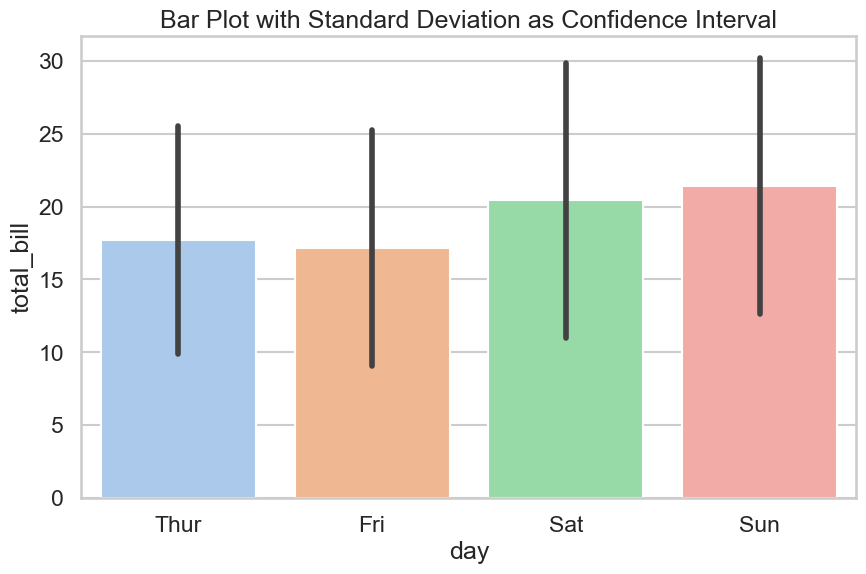

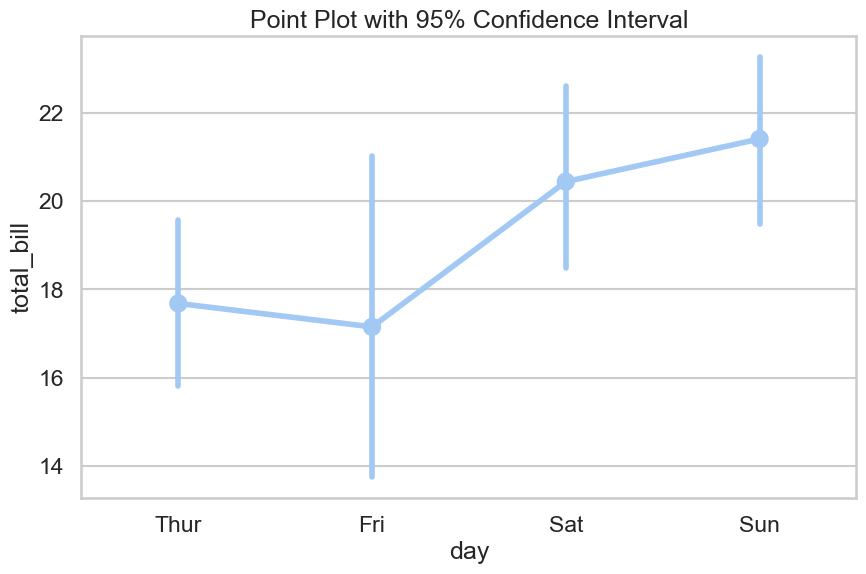

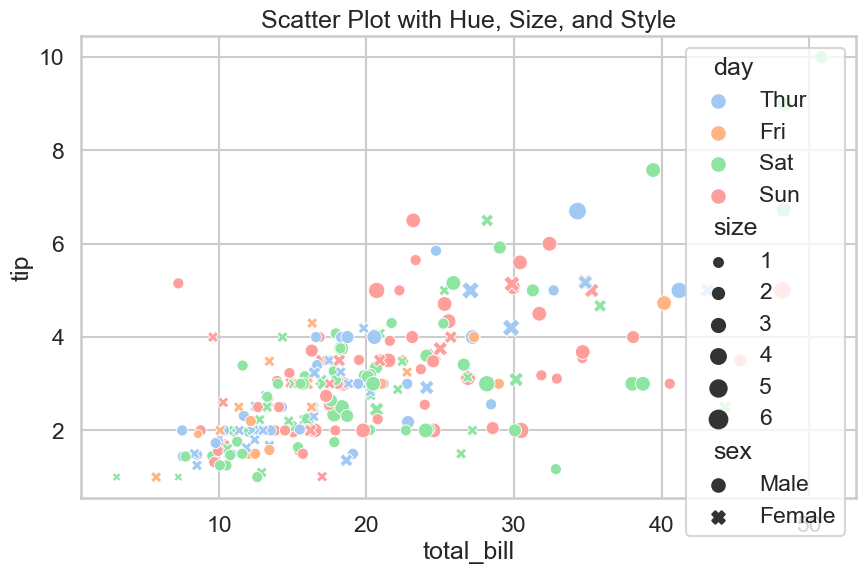

In [14]:
"""
Statistical Estimations: sns.barplot, sns.pointplot with ci parameter
Theory:
Statistical estimations in Seaborn, particularly with sns.barplot and sns.pointplot, involve calculating and 
plotting summary statistics (like mean, median) along with confidence intervals (ci). The ci parameter allows 
you to display error bars that represent the uncertainty or variability of the data.

sns.barplot: This function is used to create bar plots where the height of the bars represents the central 
tendency of the data (usually the mean). The ci parameter adds error bars to indicate the confidence interval around the mean.
sns.pointplot: Similar to sns.barplot, but it draws points with lines connecting them instead of bars. It's useful for 
comparing 
values across multiple levels of one or more categorical variables.


Explanation:
ci="sd" in sns.barplot specifies that the confidence interval should be based on the standard deviation of the data.
ci=95 in sns.pointplot specifies a 95% confidence interval, which is the default. The error bars show the range within 
which we expect the true mean to fall with 95% confidence.
"""
# Example dataset
tips = sns.load_dataset("tips")

# Bar plot with confidence interval
plt.figure(figsize=(10, 6))
sns.barplot(x="day", y="total_bill", data=tips, ci="sd")
plt.title("Bar Plot with Standard Deviation as Confidence Interval")
plt.show()

# Point plot with 95% confidence interval
plt.figure(figsize=(10, 6))
sns.pointplot(x="day", y="total_bill", data=tips, ci=95)
plt.title("Point Plot with 95% Confidence Interval")
plt.show()


"""
Working with Complex Data: hue, size, and style parameters
Theory:
Seaborn provides several ways to add more dimensions to your visualizations using the hue, size, and style parameters.

hue: Adds color to different data points based on a categorical variable.
size: Changes the size of the points based on a numeric variable.
style: Modifies the appearance (like shape or line style) based on a categorical variable.
These parameters are particularly useful when dealing with complex datasets where you want to visualize multiple 
dimensions of the data simultaneously.

Explanation:
hue="day" colors the points based on the day of the week.
size="size" changes the size of the points based on the size column, representing the size of the dining party.
style="sex" changes the shape of the points based on the gender of the diner (Male/Female).
"""
# Scatter plot with hue, size, and style
plt.figure(figsize=(10, 6))
sns.scatterplot(x="total_bill", y="tip", hue="day", size="size", style="sex", data=tips)
plt.title("Scatter Plot with Hue, Size, and Style")
plt.show()

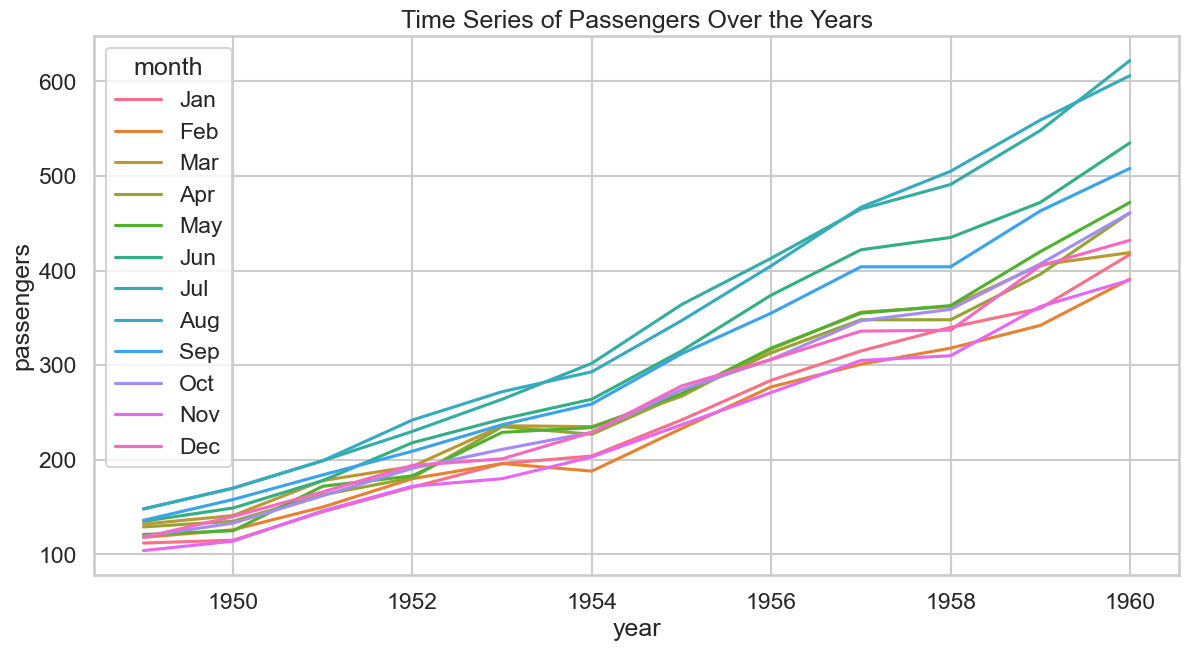

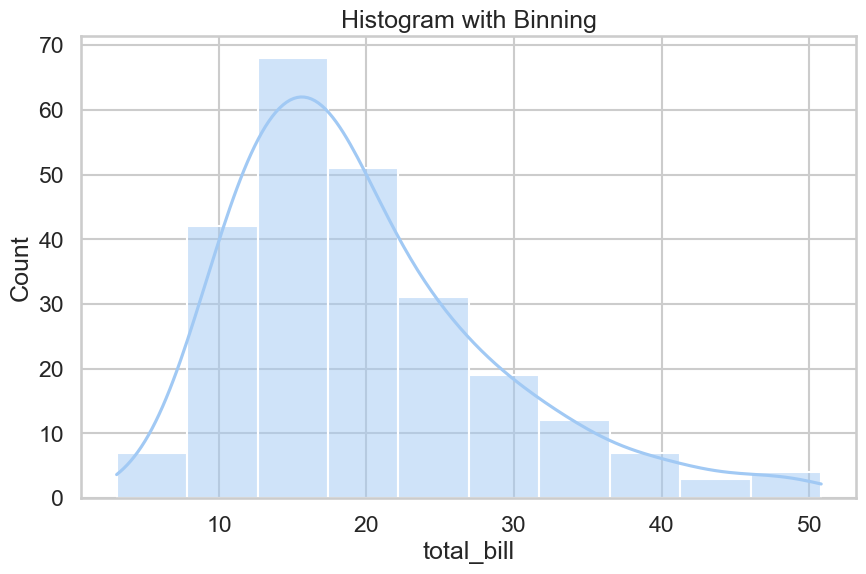

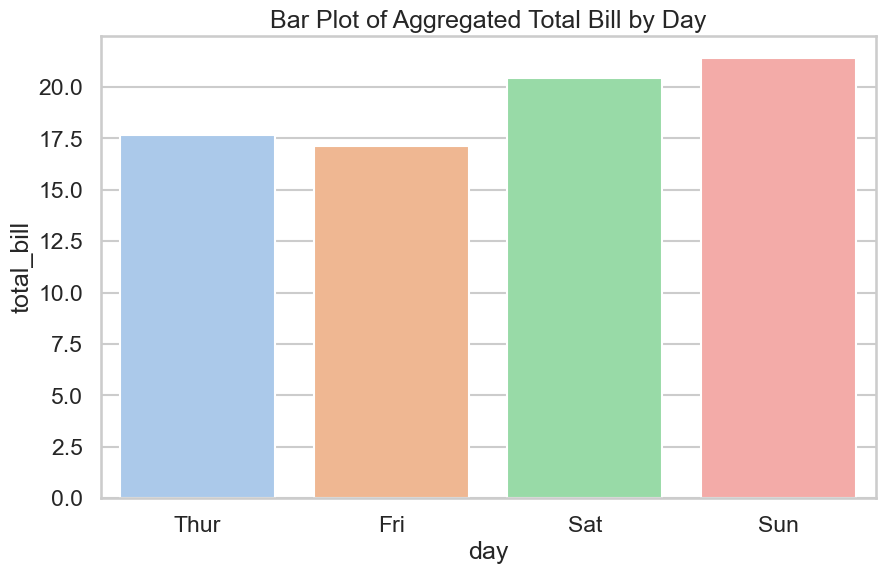

In [17]:
"""
Visualizing Time Series Data
Theory:
Time series data can be visualized effectively using Seaborn. When dealing with time series, line plots are 
commonly used to show the trend of data points over time. Seaborn can handle time series data natively, 
especially if the data is in a Pandas DataFrame with a DateTime index.

Explanation:
The hue parameter is used to differentiate data for different months.
The lineplot function automatically handles the DateTime index, making it straightforward to plot time series data.
"""
import pandas as pd
# Example time series data
flights = sns.load_dataset("flights")
flights["year"] = pd.to_datetime(flights["year"], format='%Y')

# Line plot for time series data
plt.figure(figsize=(14, 7))
sns.lineplot(x="year", y="passengers", hue="month", data=flights)
plt.title("Time Series of Passengers Over the Years")
plt.show()


"""
Data Aggregation and Binning
Theory:
Data aggregation involves summarizing data by grouping it and computing statistics for each group. 
Binning is the process of dividing continuous data into discrete intervals, which is often useful 
for histograms or visualizing distributions.

Seaborn can perform both aggregation and binning using functions like sns.histplot, 
sns.displot, or by using Pandas directly for more complex groupings.

Explanation:
bins=10 in sns.histplot specifies that the data should be divided into 10 bins.
The groupby function from Pandas is used to aggregate the total bill and tips by day, and the 
resulting DataFrame is plotted using sns.barplot.
"""
# Binning with histplot
plt.figure(figsize=(10, 6))
sns.histplot(tips["total_bill"], bins=10, kde=True)
plt.title("Histogram with Binning")
plt.show()

# Aggregating data with groupby
tips_agg = tips.groupby("day").agg({"total_bill": "mean", "tip": "mean"}).reset_index()

# Bar plot with aggregated data
plt.figure(figsize=(10, 6))
sns.barplot(x="day", y="total_bill", data=tips_agg)
plt.title("Bar Plot of Aggregated Total Bill by Day")
plt.show()